In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import re
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#csv's to combine

df_players = pd.read_csv('Players - Sheet1.csv')
df_past3 = pd.read_csv('Past 3 Months Statistics - Sheet1.csv')
df_all = pd.read_csv('All Time Statistics - Sheet1.csv')

In [3]:
#cleaning Players csv

In [4]:
selected_columns = ['Team 1','Player Full Name', 'Player', 'KD', 'KD Diff', 'ADR', 'KAST', 'Rating']
df_players1 = df_players[selected_columns]
selected_columns1 = ['Team 2','Player Full Name.1', 'Player.1', 'KD.1', 'KD Diff.1', 'ADR.1', 'KAST.1', 'Rating.1']
df_players2 = df_players[selected_columns1]
selected_columns2 = ['Team 1']
df_team1 = df_players[selected_columns2]
selected_columns3 = ['Team 1']
df_team2 = df_players[selected_columns3]

In [5]:
df_players2 = df_players2.dropna()
df_players1 = df_players1.dropna()
df_players1 = df_players1.drop_duplicates()
df_players2 = df_players2.reset_index(drop=True)
df_players2 = df_players2.drop(3205)
df_players2 = df_players2.drop(3214)
df_players2 = df_players2.reset_index(drop=True)
df_players2 = df_players2.drop(3964)
df_players2 = df_players2.reset_index(drop=True)
df_players1 = df_players1.reset_index(drop=True)
df_players1 = df_players1.drop(2249)
df_players1 = df_players1.drop(3229)
df_players1 = df_players1.reset_index(drop=True)

In [6]:
# Quality Control

In [7]:
# row_3205 = df_players2.iloc[3965]  # Note that Python uses 0-based indexing, so row 3205 is at index 3204

# print("Row 3205:")
# print(row_3205)

In [8]:
# df_players2['IsDifferent'] = df_players2['Team 2'] != df_players2['Team 2'].shift()

# # Find the rows where 'IsDifferent' is True
# rows_with_differences1 = df_players2[df_players2['IsDifferent']]

# # Examine the 'Team 2' values for these rows to identify the three rows that are different
# print(rows_with_differences1['Team 2'])


In [9]:
# rows_with_differences1

In [10]:
# for index, row in rows_with_differences1.iterrows():
#     # Check if the index does not end in 0 or 5
#     if index % 10 != 0 and index % 10 != 5:
#         print(f"First instance where the row index does not end in 0 or 5 is at index {index}")
#         break

In [11]:
# row_3205 = df_players2.iloc[3205]  # Note that Python uses 0-based indexing, so row 3205 is at index 3204

# print("Row 3205:")
# print(row_3205)

In [12]:
# start_index = 3210  # 2206 - 5
# end_index = 3222  # 2206 + 5

# # Extract the desired rows from the DataFrame
# desired_rows = df_players2.iloc[start_index:end_index + 1]

# # Print the extracted rows
# print(desired_rows)

In [13]:
# start_index = 3210  # 2206 - 5
# end_index = 3222  # 2206 + 5

# # Extract the desired rows from the DataFrame
# desired_rows = df_players2.iloc[start_index:end_index + 1]

# # Print the extracted rows
# print(desired_rows)

In [14]:
# start_index = 3956  # 2206 - 5
# end_index = 3976  # 2206 + 5

# # Extract the desired rows from the DataFrame
# desired_rows = df_players2.iloc[start_index:end_index + 1]

# # Print the extracted rows
# print(desired_rows)

In [15]:
# df_players1['IsDifferent'] = df_players1['Team 1'] != df_players1['Team 1'].shift()

# # Find the rows where 'IsDifferent' is True
# rows_with_differences = df_players1[df_players1['IsDifferent']]

# # examine the 'Team 1' values for these rows to identify the three rows that are different
# print(rows_with_differences['Team 1'])



In [16]:
# for index, row in rows_with_differences.iterrows():
#     # Check if the index does not end in 0 or 5
#     if index % 10 != 0 and index % 10 != 5:
#         print(f"First instance where the row index does not end in 0 or 5 is at index {index}")
#         break

In [17]:
# start_index = 2246  # 2206 - 5
# end_index = 2256 # 2206 + 5

# # Extract the desired rows from the DataFrame
# desired_rows = df_players1.iloc[start_index:end_index + 1]

# # Print the extracted rows
# print(desired_rows)

In [18]:
# start_index = 3221  # 2206 - 5
# end_index = 3241 # 2206 + 5

# # Extract the desired rows from the DataFrame
# desired_rows = df_players1.iloc[start_index:end_index + 1]

# # Print the extracted rows
# print(desired_rows)

In [19]:
new_column_names = {
    'Player Full Name.1': 'Player Full Name',
    'Player.1': 'Player',
    'KD.1': 'KD',
    'KD Diff.1': 'KD Diff',
    'ADR.1': 'ADR',
    'KAST.1': 'KAST',
    'Rating.1': 'Rating'
}

df_players2 = df_players2.rename(columns=new_column_names)

In [ ]:
chunks1 = [df_players1[i:i+5] for i in range(0, len(df_players1), 5)]
chunks2 = [df_players2[i:i+5] for i in range(0, len(df_players2), 5)]

df_total = pd.DataFrame(columns=['Player'])

# Interleave the chunks from df_players1 and df_players2
for chunk1, chunk2 in zip(chunks1, chunks2):
    df_total = df_total.append(chunk1, ignore_index=True)
    df_total = df_total.append(chunk2, ignore_index=True)

In [21]:
#combining scoreboards so that team 1 is first 5 rows and team 2 are next 5
combined_dfs1 = []

# Set the chunk size
chunk_size = 5

# Iterate over the range of dataframe sizes
for i in range(0, max(len(df_players1), len(df_players2)), chunk_size):
    combined_dfs1.append(df_players1[i:i+chunk_size])
    combined_dfs1.append(df_players2[i:i+chunk_size])

# Concatenate the list of dataframes into a single dataframe
combined_df1 = pd.concat(combined_dfs1, ignore_index=True)

In [ ]:
combined_df1['Team 1'].fillna(combined_df1['Team 2'], inplace=True)
combined_df1.drop(columns=['Team 2'], inplace=True)
df_teams = combined_df1[['Team 1']]
df_teams['Team'] = df_teams['Team 1'].str.split('\n').str[0]

df_teams['Team'] = df_teams['Team'].str.strip()
df_teams['Score'] = df_teams['Team 1'].str.split('\n').str[2]

df_teams['Score'] = df_teams['Score'].str.strip()

df_teams = df_teams.drop('Team 1', axis=1)
merged_df = combined_df1.merge(df_teams, left_index=True, right_index=True)
merged_df = merged_df.drop('Team 1', axis=1)
merged_df[['Kills', 'Deaths']] = merged_df['KD'].str.split('-', expand=True)

In [23]:
# Find rows with NaN values in merged_df
nan_rows = merged_df[merged_df.isna().any(axis=1)]

# Display the rows with NaN values
print(nan_rows)


Empty DataFrame
Columns: [Player Full Name, Player, KD, KD Diff, ADR, KAST, Rating, Team, Score, Kills, Deaths]
Index: []


In [24]:
# merged_df = merged_df.drop(4410)

In [25]:
# # Convert the resulting columns to integers
merged_df['Kills'] = merged_df['Kills'].astype(int)
merged_df['Deaths'] = merged_df['Deaths'].astype(int)

# # Drop the original 'KD' column
merged_df = merged_df.drop('KD', axis=1)

In [26]:
#cleaning df_past3

In [27]:
#cleaning past 3 months stats csv
df_past3['Rating 2.0'] = df_past3['Rating 2.0'].str.replace('Rating 2.0\n', '')
df_past3['KPR'] = df_past3['KPR'].str.replace('Kills per round\n', '')
df_past3['HS'] = df_past3['HS'].str.replace('Headshots\n', '')
df_past3['Maps Played'] = df_past3['Maps Played'].str.replace('Maps played\n', '')
df_past3['DPR'] = df_past3['DPR'].str.replace('Deaths per round\n', '')
df_past3['Rounds Contributed'] = df_past3['Rounds Contributed'].str.replace('Rounds contributed\n', '')

In [28]:
#combining scoreboard and past 3 months stats based on player
df_withpast3 = merged_df.merge(df_past3, on="Player", how="left")
df_withpast3 = df_withpast3.drop('Player Full Name', axis = 1)

In [29]:
#cleaning df_all

In [30]:
#fixing first 2 columns
df_test = df_all[['Field1', 'Field2']]

In [31]:
# Create an index for the new DataFrame
new_index = range(len(df_test) // 2)

# Split the values in column 2 into two columns in the new DataFrame
df_12 = pd.DataFrame({'Field1': df_test['Field2'][::2].values, 'Field2': df_test['Field2'][1::2].values}, index=new_index)
df_12 = df_12.rename(columns={"Field1": "Rounds played", "Field2": "Total kills"})

In [32]:
#fixing next 2 columns
df_test1 = df_all[['Field3', 'Time']]

In [33]:
new_index = range(len(df_test1) // 2)
df_13 = pd.DataFrame({'Field3': df_test1['Time'][::2].values, 'Time': df_test1['Time'][1::2].values}, index=new_index)
df_13 = df_13.rename(columns={"Field3": "Headshot %", "Time": "Kills / round"})

In [34]:
#fixing Field4	Field5
df_test2 = df_all[['Field4', 'Field5']]

In [35]:
new_index = range(len(df_test2) // 2)
df_13 = pd.DataFrame({'Field4': df_test2['Field5'][::2].values, 'Field5': df_test2['Field5'][1::2].values}, index=new_index)
df_13 = df_13.rename(columns={"Field4": "Total deaths", "Field5": "Assists / round"})

In [36]:
#fixing Field6	Time1
df_test3 = df_all[['Field6', 'Time1']]
new_index = range(len(df_test3) // 2)
df_14 = pd.DataFrame({'Field6': df_test3['Time1'][::2].values, 'Time1': df_test3['Time1'][1::2].values}, index=new_index)
df_14 = df_14.rename(columns={"Field6": "KD ratio", "Time1": "Deaths / round"})

In [37]:
#fixing Field7	Time2
df_test4 = df_all[['Field7', 'Time2']]
new_index = range(len(df_test4) // 2)
df_15 = pd.DataFrame({'Field7': df_test4['Time2'][::2].values, 'Time2': df_test4['Time2'][1::2].values}, index=new_index)
df_15 = df_15.rename(columns={"Field7": "Damage / round", "Time2": "Saved by teammate / round"})

In [38]:
#fixing Field8	Time3
df_test5 = df_all[['Field8', 'Time3']]
new_index = range(len(df_test5) // 2)
df_16 = pd.DataFrame({'Field8': df_test5['Time3'][::2].values, 'Time3': df_test5['Time3'][1::2].values}, index=new_index)
df_16 = df_16.rename(columns={"Field8": "Grenade dmg / round", "Time3": "Saved teammate / round"})

In [39]:
#fixing Field9	Field10
df_test6 = df_all[['Field9', 'Field10']]
new_index = range(len(df_test6) // 2)
df_17 = pd.DataFrame({'Field9': df_test6['Field10'][::2].values, 'Field10': df_test6['Field10'][1::2].values}, index=new_index)
df_17 = df_17.rename(columns={"Field9": "Maps Played", "Field10": "Rating 1.0"})

In [40]:
dataframes = [df_12, df_13, df_14, df_15, df_16, df_17]
df_fixed = pd.concat(dataframes, axis=1)

In [41]:
#combining the dataframes

In [42]:
df_all = df_all.rename(columns={'Text': 'Player'})

In [43]:
df_all = df_all[['Player']]

In [44]:
df_all = df_all.iloc[::2]

In [45]:
df_all.reset_index(drop=True, inplace=True)

In [46]:
result = pd.concat([df_all, df_fixed], axis=1)

In [47]:
result.drop_duplicates(subset=['Player'], keep='first', inplace=True)

In [48]:
#combining the final 2 dataframes

In [49]:
df_final = pd.merge(df_withpast3, result, on="Player", how="left")


In [50]:
df_final = df_final.fillna(0)

In [51]:
df_final['Score'] = df_final['Score'].astype(int)

In [53]:
df_finals = df_final.iloc[::5]

In [54]:
df_finals['Score'] = pd.to_numeric(df_finals['Score'], errors='coerce')

df_finals.reset_index(drop=True, inplace=True)

df_finals['Result'] = 0  # Initialize the 'Result' column with zeros

num_rows = len(df_finals)

for i in range(0, num_rows - 1, 2):  # Iterate over each pair of rows
    if df_finals.loc[i, 'Score'] > df_finals.loc[i + 1, 'Score']:
        df_finals.at[i, 'Result'] = 1
    elif df_finals.loc[i, 'Score'] < df_finals.loc[i + 1, 'Score']:
        df_finals.at[i + 1, 'Result'] = 1

C:\Users\james\AppData\Local\Temp\ipykernel_17396\3353182524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finals['Score'] = pd.to_numeric(df_finals['Score'], errors='coerce')
C:\Users\james\AppData\Local\Temp\ipykernel_17396\3353182524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finals['Result'] = 0  # Initialize the 'Result' column with zeros


In [55]:
result_col = df_finals[['Result']]

In [56]:
result_col_duplicated = result_col.loc[result_col.index.repeat(5)].reset_index(drop=True)

In [58]:
df_final = pd.concat([df_final, result_col_duplicated], axis=1)

In [59]:
df_final = df_final.drop(columns=['Score'])

In [60]:
count_ones = (df_final['Result'] == 1).sum()

In [61]:
df_final.to_csv('readyforML2.csv', index=False)

In [68]:
df = pd.read_csv('readyforML2.csv')
df1 = pd.read_csv('New Stats - Sheet1.csv')
df2 = pd.read_csv('2nd new data - Sheet1.csv')
df3 = pd.read_csv('3rd new data - Sheet1.csv')

In [69]:
df_25 = df2.drop(['Field1'], axis=1, errors='ignore')
# Extract string and numeric portions into separate columns
df2[['Metric', 'Value']] = df2['Field1'].str.extract(r'(.+)\n(.+)')
# Convert the 'Value' column to numeric, handling percentages
df2['Value'] = pd.to_numeric(df2['Value'].str.rstrip('%'), errors='coerce')
df2 = df2[['Text', 'Metric', 'Value']]
# Aggregate duplicate entries by taking the mean
df2 = df2.groupby(['Text', 'Metric']).mean().reset_index()
# Pivot the DataFrame to have metrics as columns
result_df2 = df2.pivot(index='Text', columns='Metric', values='Value')
result_df2 = result_df2.reset_index()
result_df2.rename(columns={'Text': 'Player'}, inplace=True)
result_df2.columns.name = None

df_35 = df3.drop(['Field1'], axis=1, errors='ignore')

# Extract string and numeric portions into separate columns
df3[['Metric', 'Value']] = df3['Field1'].str.extract(r'(.+)\n(.+)')

# Convert the 'Value' column to numeric, handling percentages
df3['Value'] = pd.to_numeric(df3['Value'].str.rstrip('%'), errors='coerce')
df3 = df3[['Text', 'Metric', 'Value']]
# Aggregate duplicate entries by taking the mean
df3 = df3.groupby(['Text', 'Metric']).mean().reset_index()

# Pivot the DataFrame to have metrics as columns
result_df3 = df3.pivot(index='Text', columns='Metric', values='Value')
result_df3 = result_df3.reset_index()
result_df3.rename(columns={'Text': 'Player'}, inplace=True)
result_df3.columns.name = None
df_15 = df1.drop(['Field1'], axis=1, errors='ignore')
# Extract string and numeric portions into separate columns
df1[['Metric', 'Value']] = df1['Field1'].str.extract(r'(.+)\n(.+)')

# Convert the 'Value' column to numeric, handling percentages
df1['Value'] = pd.to_numeric(df1['Value'].str.rstrip('%'), errors='coerce')
df1 = df1[['Text', 'Metric', 'Value']]
# Aggregate duplicate entries by taking the mean
df1 = df1.groupby(['Text', 'Metric']).mean().reset_index()

# Pivot the DataFrame to have metrics as columns
result_df = df1.pivot(index='Text', columns='Metric', values='Value')
result_df = result_df.reset_index()
result_df.rename(columns={'Text': 'Player'}, inplace=True)
result_df.columns.name = None
df_15 = df_15.dropna()
df_15 = df_15[df_15['Field2'].str.contains(r'\d')]


df_15 = df_15.groupby('Text').apply(lambda x: pd.Series(x['Field2'].to_list())).unstack()

# Rename the columns
df_15.columns = [f'Column_{i+1}' for i in range(len(df_15.columns))]

# Reset index
df_15.reset_index(inplace=True)
columns_to_keep = ['Text', 'Column_1', 'Column_2', 'Column_3', 'Column_4']
df_15 = df_15[columns_to_keep]
df_15.rename(columns={'Text': 'Player',
                      'Column_1': 'Rating All Time',
                      'Column_2': 'Rating Online',
                      'Column_3': 'LAN Rating',
                      'Column_4': 'Major Rating'}, inplace=True)
df_15 = df_15.fillna(0)

df_15 = df_15.astype(str)

# Extract numbers within parentheses and create new columns
pattern = re.compile(r'\((\d+(\.\d+)?)\)')
for col in df_15.columns[1:]:
    df_15[col + ' Parentheses'] = df_15[col].apply(lambda x: float(pattern.search(x).group(1)) if pattern.search(x) else 0)

# Remove parentheses from the original columns
df_15 = df_15.replace(to_replace=r'\((\d+(\.\d+)?)\)', value='', regex=True)

df_15 = df_15.rename(columns={
    'Rating All Time Parentheses': 'All Time Maps Played',
    'Rating Online Parentheses': 'Online Maps Played',
    'LAN Rating Parentheses': 'Lan Maps Played',
    'Major Rating Parentheses': 'Major Maps Played'
})
df_25 = df_25.dropna()
df_25 = df_25[df_25['Field2'].str.contains(r'\d')]


df_25 = df_25.groupby('Text').apply(lambda x: pd.Series(x['Field2'].to_list())).unstack()

# Rename the columns
df_25.columns = [f'Column_{i+1}' for i in range(len(df_25.columns))]

# Reset index
df_25.reset_index(inplace=True)
columns_to_keep = ['Text', 'Column_1', 'Column_2', 'Column_3', 'Column_4']
df_25 = df_25[columns_to_keep]
df_25.rename(columns={'Text': 'Player',
                      'Column_1': 'Rating All Time',
                      'Column_2': 'Rating Online',
                      'Column_3': 'LAN Rating',
                      'Column_4': 'Major Rating'}, inplace=True)
df_25 = df_25.fillna(0)

df_25 = df_25.astype(str)

# Extract numbers within parentheses and create new columns
pattern = re.compile(r'\((\d+(\.\d+)?)\)')
for col in df_25.columns[1:]:
    df_25[col + ' Parentheses'] = df_25[col].apply(lambda x: float(pattern.search(x).group(1)) if pattern.search(x) else 0)

# Remove parentheses from the original columns
df_25 = df_25.replace(to_replace=r'\((\d+(\.\d+)?)\)', value='', regex=True)

df_25 = df_25.rename(columns={
    'Rating All Time Parentheses': 'All Time Maps Played',
    'Rating Online Parentheses': 'Online Maps Played',
    'LAN Rating Parentheses': 'Lan Maps Played',
    'Major Rating Parentheses': 'Major Maps Played'
})
df_35 = df_35.dropna()
df_35 = df_35[df_35['Field2'].str.contains(r'\d')]


df_35 = df_35.groupby('Text').apply(lambda x: pd.Series(x['Field2'].to_list())).unstack()

# Rename the columns
df_35.columns = [f'Column_{i+1}' for i in range(len(df_35.columns))]

# Reset index
df_35.reset_index(inplace=True)
columns_to_keep = ['Text', 'Column_1', 'Column_2', 'Column_3', 'Column_4']
df_35 = df_35[columns_to_keep]
df_35.rename(columns={'Text': 'Player',
                      'Column_1': 'Rating All Time',
                      'Column_2': 'Rating Online',
                      'Column_3': 'LAN Rating',
                      'Column_4': 'Major Rating'}, inplace=True)
df_35 = df_35.fillna(0)

df_35 = df_35.astype(str)

# Extract numbers within parentheses and create new columns
pattern = re.compile(r'\((\d+(\.\d+)?)\)')
for col in df_35.columns[1:]:
    df_35[col + ' Parentheses'] = df_35[col].apply(lambda x: float(pattern.search(x).group(1)) if pattern.search(x) else 0)

# Remove parentheses from the original columns
df_35 = df_35.replace(to_replace=r'\((\d+(\.\d+)?)\)', value='', regex=True)

df_35 = df_35.rename(columns={
    'Rating All Time Parentheses': 'All Time Maps Played',
    'Rating Online Parentheses': 'Online Maps Played',
    'LAN Rating Parentheses': 'Lan Maps Played',
    'Major Rating Parentheses': 'Major Maps Played'
})
result_df4 = pd.concat([result_df, result_df2, result_df3], ignore_index=True)
result_df4 = result_df4.drop_duplicates(subset='Player', keep='first')
df = pd.merge(df, result_df4, on='Player', how='left')
df_finalmerge = pd.concat([df_15, df_25, df_35], ignore_index=True)
df_finalmerge = df_finalmerge.drop_duplicates(subset='Player', keep='first')
df = pd.merge(df, df_finalmerge, on='Player', how='left')
df
rows_with_nan = df[df.isna().any(axis=1)]

print(rows_with_nan)
df.info()
df['Matches Won'] = df.groupby('Player')['Result'].transform('sum')
df['Matches Lost'] = df.groupby('Player')['Result'].transform(lambda x: (x == 0).sum())
df['Team Matches Won'] = df.groupby('Team')['Result'].transform('sum')
df['Team Matches Lost'] = df.groupby('Team')['Result'].transform(lambda x: (x == 0).sum())
df['Player/Team Matches Won'] = df.groupby(['Player', 'Team'])['Result'].transform('sum')
df['Player/Team Matches Lost'] = df.groupby(['Player', 'Team'])['Result'].transform(lambda x: (x == 0).sum())
df['Match Number'] = np.ceil((df.index + 1) / 10).astype(int)
df['Rating All Time'] = pd.to_numeric(df['Rating All Time'], errors='coerce')
df['Rating Online'] = pd.to_numeric(df['Rating Online'], errors='coerce')
df['LAN Rating'] = pd.to_numeric(df['LAN Rating'], errors='coerce')
df['Major Rating'] = pd.to_numeric(df['Major Rating'], errors='coerce')
df['HS'] = df['HS'].str.replace('%', '').astype(float)
df['Rounds Contributed'] = df['Rounds Contributed'].str.replace('%', '').astype(float)

Empty DataFrame
Columns: [Player, KD Diff, ADR, KAST, Rating, Team, Kills, Deaths, Rating 2.0, KPR, HS, Maps Played_x, DPR, Rounds Contributed, Rounds played, Total kills, Total deaths, Assists / round, KD ratio, Deaths / round, Damage / round, Saved by teammate / round, Grenade dmg / round, Saved teammate / round, Maps Played_y, Rating 1.0, Result, First kill in won rounds, Opening kill rating, Opening kill ratio, Team win percent after first kill, Total opening deaths, Total opening kills, Rating All Time, Rating Online, LAN Rating, Major Rating, All Time Maps Played, Online Maps Played, Lan Maps Played, Major Maps Played]
Index: []

[0 rows x 41 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player                             9600 non-null   object 
 1   KD Diff                       

In [70]:
#columns used for machine learning
df.columns
df['KAST'] = df['KAST'].str.replace('%', '')

df['KAST'] = df['KAST'].astype(float)
df.fillna(0, inplace=True)
cat_df = df[['Team','Player']].copy()
cont_df = df[['KD Diff', 'ADR', 'KAST', 'Rating', 'Kills', 'Deaths',
       'Rating 2.0', 'KPR', 'HS', 'Maps Played_x', 'DPR', 'Rounds Contributed',
       'Rounds played', 'Total kills', 'Total deaths', 'Assists / round',
       'KD ratio', 'Deaths / round', 'Damage / round',
       'Saved by teammate / round', 'Grenade dmg / round',
       'Saved teammate / round', 'Maps Played_y', 'Rating 1.0', 'First kill in won rounds', 'Opening kill rating', 'Opening kill ratio',
       'Team win percent after first kill', 'Total opening deaths',
       'Total opening kills', 'Rating All Time', 'Rating Online', 'LAN Rating',
       'Major Rating', 'All Time Maps Played', 'Online Maps Played',
       'Lan Maps Played', 'Major Maps Played', 'Matches Won', 'Matches Lost',
       'Team Matches Won', 'Team Matches Lost', 'Player/Team Matches Won',
       'Player/Team Matches Lost', 'Match Number','Result']].copy()

Selected Features: Index(['KD Diff', 'ADR', 'KAST', 'Rating', 'Kills', 'Deaths', 'Major Rating',
       'Lan Maps Played', 'Major Maps Played', 'Matches Won', 'Matches Lost',
       'Team Matches Won', 'Team Matches Lost', 'Player/Team Matches Won',
       'Player/Team Matches Lost'],
      dtype='object')
Feature Scores: [2.43782048e+03 9.36292509e+02 3.15249599e+03 3.01372639e+03
 2.30090481e+02 2.78187970e+02 1.59932509e+01 1.39667625e+01
 9.24049845e+00 4.43511837e-02 8.14037663e+00 1.48537293e+01
 3.81650255e+01 3.34385394e+01 2.95999259e+01 1.82340324e-01
 1.03032432e+01 7.01111031e+00 6.62460904e+00 8.90050718e+00
 1.89642551e+00 8.79826996e-01 3.17331541e+01 5.29889963e+00
 2.84171236e+00 4.86107185e+00 1.46234572e+00 1.81842778e+01
 2.72666554e+01 3.59273372e+01 1.03286991e+01 8.12679331e+00
 4.25908377e+01 1.71898527e+02 3.08499803e+01 1.67876489e+00
 1.08194795e+02 7.52086934e+01 4.71337403e+02 1.87789596e+02
 5.33274015e+02 1.39000756e+02 4.35449871e+02 1.60349654e+02
 3.99

C:\Users\james\AppData\Local\Temp\ipykernel_21780\3086552117.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores_df, palette='viridis')


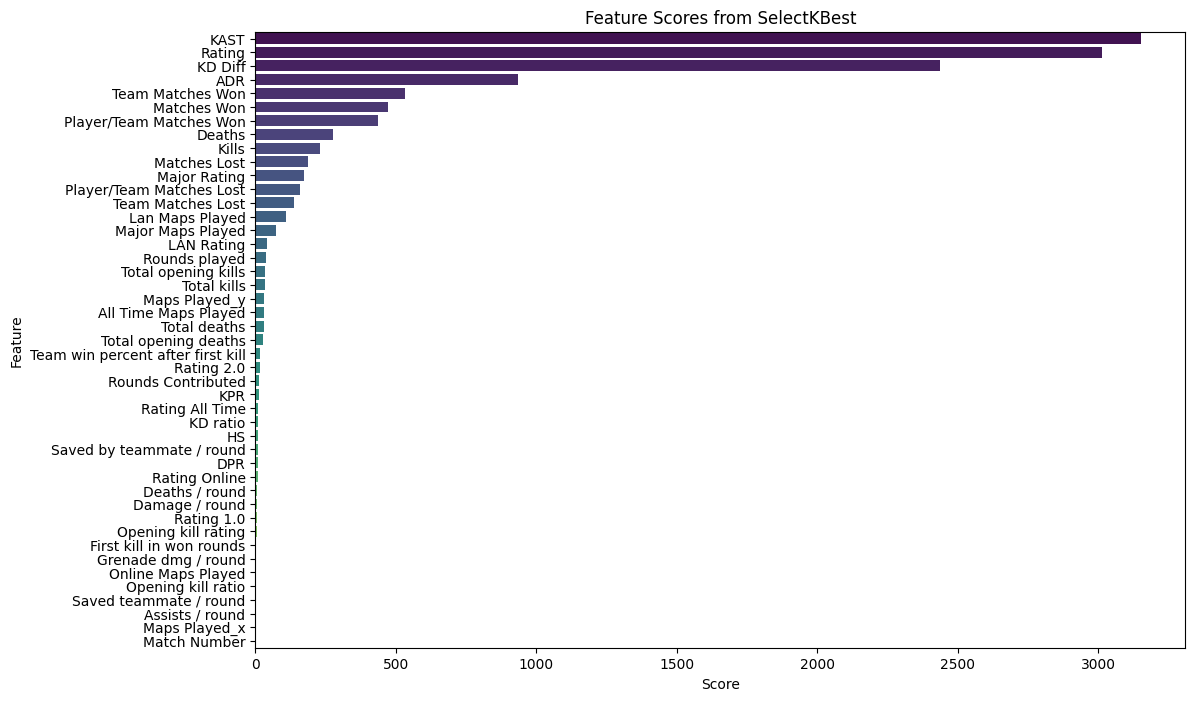

In [43]:
#Using selectKBest
X = cont_df.drop('Result', axis=1)
y = cont_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_regression, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]


feature_scores = selector.scores_

print("Selected Features:", selected_features)
print("Feature Scores:", feature_scores)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores_df, palette='viridis')
plt.title('Feature Scores from SelectKBest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

In [71]:
label_encoder = LabelEncoder()
cat_df['Player'] = label_encoder.fit_transform(cat_df['Player'])
cat_df['Team'] = label_encoder.fit_transform(cat_df['Team'])
label_encoder = LabelEncoder()
df['Player'] = label_encoder.fit_transform(df['Player'])
df['Team'] = label_encoder.fit_transform(df['Team'])
correlation_matrix = cont_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Correlation Matrix:
                                    KD Diff       ADR      KAST    Rating  \
KD Diff                            1.000000  0.713180  0.670027  0.880387   
ADR                                0.713180  1.000000  0.543272  0.863343   
KAST                               0.670027  0.543272  1.000000  0.786739   
Rating                             0.880387  0.863343  0.786739  1.000000   
Kills                              0.458573  0.423298  0.284300  0.412212   
Deaths                            -0.262880 -0.082977 -0.201061 -0.222218   
Rating 2.0                         0.190813  0.183554  0.111950  0.183232   
KPR                                0.193014  0.188088  0.107319  0.184720   
HS                                 0.006140  0.137788  0.024335  0.060812   
Maps Played_x                      0.067671  0.075930  0.035679  0.070827   
DPR                                0.040765  0.125249  0.022966  0.075249   
Rounds Contributed                 0.138111  0.144275  0

In [ ]:
# Using RFE
X = df.drop('Result', axis=1)
y = df['Result']
model = LogisticRegression()

selector = RFE(model, n_features_to_select=15)

selector.fit(X, y)

selected_features = X.columns[selector.support_]

feature_ranking = selector.ranking_

print("Selected features:")
print(selected_features)

In [72]:
selected_columns_kbest = ['KD Diff', 'ADR', 'KAST', 'Rating', 'Kills', 'Deaths', 'Major Rating',
       'Lan Maps Played', 'Major Maps Played', 'Matches Won', 'Matches Lost',
       'Team Matches Won', 'Team Matches Lost', 'Player/Team Matches Won',
       'Player/Team Matches Lost']
selected_columns = ['KD Diff', 'ADR', 'KAST', 'Rating', 'Kills', 'Deaths',
       'Assists / round', 'Deaths / round', 'Saved teammate / round',
       'Total opening deaths', 'Total opening kills', 'LAN Rating',
       'Matches Won', 'Matches Lost', 'Team Matches Won','Result']
df_new = df[selected_columns].copy()

In [75]:
X = df_new.drop('Result', axis=1)
y = df_new['Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.15, callbacks=[early_stopping])

train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.2f}")

val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy:.2f}")

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)



Epoch 1/50
653/653 [==============================] - 1s 1ms/step - loss: 0.5157 - accuracy: 0.7408 - val_loss: 0.4756 - val_accuracy: 0.7569
Epoch 2/50
653/653 [==============================] - 1s 879us/step - loss: 0.4579 - accuracy: 0.7791 - val_loss: 0.4875 - val_accuracy: 0.7491
Epoch 3/50
653/653 [==============================] - 1s 876us/step - loss: 0.4453 - accuracy: 0.7843 - val_loss: 0.4972 - val_accuracy: 0.7561
Epoch 4/50
653/653 [==============================] - 1s 881us/step - loss: 0.4366 - accuracy: 0.7883 - val_loss: 0.4617 - val_accuracy: 0.7613
Epoch 5/50
653/653 [==============================] - 1s 868us/step - loss: 0.4317 - accuracy: 0.7963 - val_loss: 0.4647 - val_accuracy: 0.7587
Epoch 6/50
653/653 [==============================] - 1s 871us/step - loss: 0.4259 - accuracy: 0.7941 - val_loss: 0.4432 - val_accuracy: 0.7734
Epoch 7/50
653/653 [==============================] - 1s 877us/step - loss: 0.4248 - accuracy: 0.7960 - val_loss: 0.4431 - val_accuracy: 0